In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model  # will be using for plotting trend line
from sklearn.preprocessing import MinMaxScaler # for normalizing data
from sklearn.cluster import KMeans 
pd.set_option('display.max_rows', 1000)
%matplotlib inline
from difflib import SequenceMatcher
import seaborn as sn
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression


In [14]:
data = pd.read_csv("final_cleaned_spotify.csv")
data.shape

(137014, 20)

In [15]:
data.head()

,name,artists,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,popularity,speechiness,tempo,valence,year,pop_artist,Top100,artist_already_pop
0,!Que Vida! - Mono Version,['Love'],0.525000,0.600,220560.0,0.540,0.0,0.00305,9.0,0.100,-11.803,1.0,26.0,0.0328,125.898,0.547,1966,0,0,0
1,"""40""",['U2'],0.228000,0.368,157840.0,0.480,0.0,0.70700,8.0,0.159,-11.605,1.0,21.0,0.0306,150.166,0.338,1983,0,0,0
2,"""40"" - Live",['U2'],0.099800,0.272,226200.0,0.684,0.0,0.01450,8.0,0.946,-9.728,1.0,41.0,0.0505,143.079,0.279,1983,0,0,0
3,"""40"" - Remastered 2008",['U2'],0.185000,0.371,157667.0,0.545,0.0,0.58200,8.0,0.183,-9.315,1.0,36.0,0.0307,150.316,0.310,1983,0,0,0
4,"""45""",['The Gaslight Anthem'],0.000696,0.315,202493.0,0.970,0.0,0.00000,8.0,0.277,-4.709,1.0,48.0,0.1020,178.068,0.423,2012,1,0,0


In [16]:
data["pop_artist"].value_counts()


1    84394
0    52620
Name: pop_artist, dtype: int64

In [17]:
data["Top100"].value_counts()

0    133342
1      3672
Name: Top100, dtype: int64

In [18]:
data["artist_already_pop"].value_counts()

0    117543
1     19471
Name: artist_already_pop, dtype: int64

In [67]:
data_graph= data[["acousticness","danceability","energy","instrumentalness","liveness","speechiness","valence","Top100"]]
data_graph = data_graph.groupby(["Top100"], as_index=False).mean()


In [73]:
df = data_graph.transpose()
df.columns = df.iloc[0]
df = df[1:]
df = df.rename(columns={df.columns[0]: "Not Hit", df.columns[1]: "Hit"})


In [74]:
df

Top100,Not Hit,Hit
acousticness,0.451176,0.273631
danceability,0.535693,0.618856
energy,0.515098,0.612351
instrumentalness,0.142370,0.024183
liveness,0.205931,0.175167
speechiness,0.081646,0.065930
valence,0.524557,0.605258


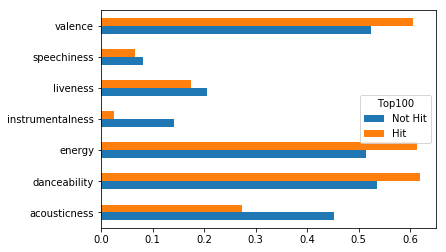

In [75]:

df.plot.barh()

The predominant variables within the two categories are the same: energy, danceability and valence. The only difference is that the average values ​​of these variables are higher for the hit songs category.

In [31]:
X = data[["acousticness","danceability","energy","instrumentalness","liveness","speechiness","valence"]]
y = data["Top100"]
clf = LogisticRegression(random_state=0).fit(X, y)
clf.fit(X, y)
print(clf.coef_[0])
weights = pd.DataFrame(columns=["Weights", "Coefficient"])
weights["Weights"] = clf.coef_[0]
weights["Coefficient"] = X.columns


/Users/adiepresent/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/adiepresent/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[-1.09614514  2.18604006  0.19293436 -2.62178561 -0.80605497 -3.72191341
  0.02450432]


In [35]:
weights.reindex(weights.Weights.abs().sort_values(ascending=False).index)

,Weights,Coefficient
5,-3.721913,speechiness
3,-2.621786,instrumentalness
1,2.186040,danceability
0,-1.096145,acousticness
4,-0.806055,liveness
2,0.192934,energy
6,0.024504,valence


The weights really dont pain't a clear picture about which variables are predominant. -- actually paints the opossitve about what we intially thought the predominant variables were. 



In [78]:
X = data[["acousticness","danceability","energy","instrumentalness","liveness","speechiness","valence","artist_already_pop","popularity"]]
y = data["Top100"]
clf = LogisticRegression(random_state=0).fit(X, y)
clf.fit(X, y)
print(clf.coef_[0])
weights = pd.DataFrame(columns=["Weights", "Coefficient"])
weights["Weights"] = clf.coef_[0]
weights["Coefficient"] = X.columns

/Users/adiepresent/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/adiepresent/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[-0.60622501  0.41646465 -0.80472341 -2.01350516 -0.45811878 -3.88309401
  1.26760992 -0.17273068  0.05736292]


In [79]:
weights.reindex(weights.Weights.abs().sort_values(ascending=False).index)

,Weights,Coefficient
5,-3.883094,speechiness
3,-2.013505,instrumentalness
6,1.267610,valence
2,-0.804723,energy
0,-0.606225,acousticness
4,-0.458119,liveness
1,0.416465,danceability
7,-0.172731,artist_already_pop
8,0.057363,popularity
